In [6]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 6)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

import csv

In [7]:
df = pd.read_csv(os.path.join('..', 'datasets', 'storms.csv.gz'))

In [8]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,8742.0,0.0,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0
902296,1.0,11/28/2011 0:00:00,08:00:00 PM,CST,6.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: An intense upper level low ...,902297.0


In [34]:
df = df.set_index('REFNUM')

In [12]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS',
       u'REFNUM'],
      dtype='object')

In [18]:
df.EVTYPE.nunique()

985

In [19]:
df.isnull().sum()

STATE__            0
BGN_DATE           0
BGN_TIME           0
               ...  
LONGITUDE_         0
REMARKS       287433
REFNUM             0
dtype: int64

In [21]:
a = df.isnull().sum()

for column in df.columns:
    print "{:20s} {:2.1f}".format(column, 100. * a[column] / len(df))

STATE__              0.0
BGN_DATE             0.0
BGN_TIME             0.0
TIME_ZONE            0.0
COUNTY               0.0
COUNTYNAME           0.2
STATE                0.0
EVTYPE               0.0
BGN_RANGE            0.0
BGN_AZI              60.7
BGN_LOCATI           31.9
END_DATE             27.0
END_TIME             26.5
COUNTY_END           0.0
COUNTYENDN           100.0
END_RANGE            0.0
END_AZI              80.3
END_LOCATI           55.3
LENGTH               0.0
WIDTH                0.0
F                    93.5
MAG                  0.0
FATALITIES           0.0
INJURIES             0.0
PROPDMG              0.0
PROPDMGEXP           51.6
CROPDMG              0.0
CROPDMGEXP           68.5
WFO                  15.7
STATEOFFIC           27.6
ZONENAMES            65.8
LATITUDE             0.0
LONGITUDE            0.0
LATITUDE_E           0.0
LONGITUDE_           0.0
REMARKS              31.9
REFNUM               0.0


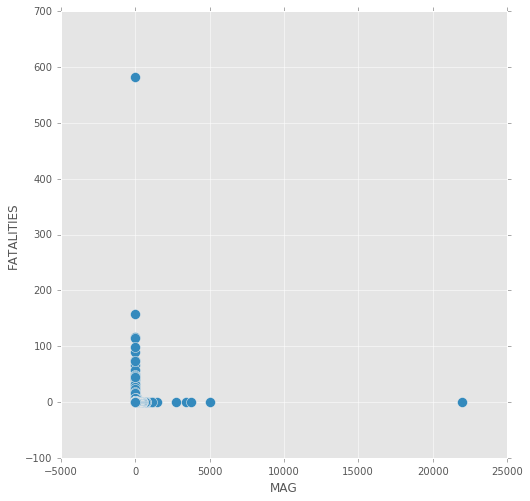

In [25]:
df[['MAG', 'FATALITIES']].plot(kind = 'scatter', x = 'MAG', y = 'FATALITIES', s = 100, figsize = (8, 8))

In [31]:
df.dropna(axis = 1).columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY', u'STATE',
       u'EVTYPE', u'BGN_RANGE', u'COUNTY_END', u'END_RANGE', u'LENGTH',
       u'WIDTH', u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'CROPDMG',
       u'LONGITUDE', u'LONGITUDE_', u'REFNUM'],
      dtype='object')

In [37]:
df[df.duplicated()]

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
19.0,1.0,5/10/1952 0:00:00,900,CST,57.0,...,3344.0,8745.0,0.0,0.0,NaN
20.0,1.0,5/10/1952 0:00:00,900,CST,57.0,...,3344.0,8745.0,0.0,0.0,NaN
260.0,1.0,7/4/1960 0:00:00,1750,CST,13.0,...,3139.0,8636.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
900807.0,36.0,10/29/2011 0:00:00,01:00:00 PM,EST,57.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: An early season winter stor...
900808.0,38.0,10/24/2011 0:00:00,03:03:00 PM,CST,7.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: Seasonably warm and dry con...
900809.0,27.0,10/5/2011 0:00:00,03:00:00 PM,CST,5.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A wildfire originated in Ju...


In [44]:
df.EVTYPE.unique()

array(['TORNADO', 'TSTM WIND', 'HAIL', 'FREEZING RAIN', 'SNOW',
       'ICE STORM/FLASH FLOOD', 'SNOW/ICE', 'WINTER STORM',
       'HURRICANE OPAL/HIGH WINDS', 'THUNDERSTORM WINDS', 'RECORD COLD',
       'HURRICANE ERIN', 'HURRICANE OPAL', 'HEAVY RAIN', 'LIGHTNING',
       'THUNDERSTORM WIND', 'DENSE FOG', 'RIP CURRENT',
       'THUNDERSTORM WINS', 'FLASH FLOOD', 'FLASH FLOODING', 'HIGH WINDS',
       'FUNNEL CLOUD', 'TORNADO F0', 'THUNDERSTORM WINDS LIGHTNING',
       'THUNDERSTORM WINDS/HAIL', 'HEAT', 'WIND', 'LIGHTING',
       'HEAVY RAINS', 'LIGHTNING AND HEAVY RAIN', 'FUNNEL', 'WALL CLOUD',
       'FLOODING', 'THUNDERSTORM WINDS HAIL', 'FLOOD', 'COLD',
       'HEAVY RAIN/LIGHTNING', 'FLASH FLOODING/THUNDERSTORM WI',
       'WALL CLOUD/FUNNEL CLOUD', 'THUNDERSTORM', 'WATERSPOUT',
       'EXTREME COLD', 'HAIL 1.75)', 'LIGHTNING/HEAVY RAIN', 'HIGH WIND',
       'BLIZZARD', 'BLIZZARD WEATHER', 'WIND CHILL', 'BREAKUP FLOODING',
       'HIGH WIND/BLIZZARD', 'RIVER FLOOD', 'HEAVY SNOW', 

In [57]:
df[['MAG', 'PROPDMG']].corr()

,MAG,PROPDMG
MAG,1.000000,-0.077232
PROPDMG,-0.077232,1.000000


In [55]:
df['FATALITIES']

REFNUM
1.0         0.0
2.0         0.0
3.0         0.0
           ... 
902295.0    0.0
902296.0    0.0
902297.0    0.0
Name: FATALITIES, dtype: float64

In [58]:
df.shape

(902297, 36)

In [59]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS'],
      dtype='object')

In [62]:
df.PROPDMG.isnull().sum()

0

In [65]:
df.PROPDMGEXP.notnull().sum()

436363

In [69]:
df = df[(df.FATALITIES > 0) | (df.INJURIES > 0) | df.PROPDMGEXP.notnull() | df.CROPDMGEXP.notnull()]

df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1.0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,3040.0,8812.0,3051.0,8806.0,NaN
2.0,1.0,4/18/1950 0:00:00,145,CST,3.0,...,3042.0,8755.0,0.0,0.0,NaN
3.0,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,3340.0,8742.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902295.0,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...
902296.0,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...
902297.0,1.0,11/28/2011 0:00:00,08:00:00 PM,CST,6.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: An intense upper level low ...


In [74]:
len(df.EVTYPE.unique())

447

In [72]:
(df.EVTYPE.value_counts() ==1).sum()

247

In [73]:
df['EVTYPE'] = df.EVTYPE.apply(lambda type: type.strip().upper())

In [75]:
(df.EVTYPE.value_counts() ==1).sum()

224

In [76]:
df['EVTYPE'] = df.EVTYPE.apply(lambda type: type.strip().upper())

official_event_types = [
   'Astronomical Low Tide', 'Avalanche',
   'Blizzard', 'Coastal Flood', 'Cold/Wind Chill', 'Debris Flow',
   'Dense Fog', 'Dense Smoke', 'Drought', 'Dust Devil', 'Dust Storm',
   'Excessive Heat', 'Extreme Cold/Wind Chill', 'Flash Flood', 'Flood',
   'Frost/Freeze', 'Funnel Cloud', 'Freezing Fog', 'Hail', 'Heat',
   'Heavy Rain', 'Heavy Snow', 'High Surf', 'High Wind',
   'Hurricane (Typhoon)', 'Ice Storm', 'Lake-Effect Snow',
   'Lakeshore Flood', 'Lightning', 'Marine Hail', 'Marine High Wind',
   'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Rip Current',
   'Seiche', 'Sleet', 'Storm Surge/Tide', 'Strong Wind',
   'Thunderstorm Wind', 'Tornado', 'Tropical Depression',
   'Tropical Storm', 'Tsunami', 'Volcanic Ash', 'Waterspout', 'Wildfire',
   'Winter Storm', 'Winter Weather',

   # We are also adding 'OTHER'...
   'OTHER'
]

official_event_types = map(lambda type: type.upper(), official_event_types)

In [77]:
len(official_event_types)

49

In [78]:
official_event_types

['ASTRONOMICAL LOW TIDE',
 'AVALANCHE',
 'BLIZZARD',
 'COASTAL FLOOD',
 'COLD/WIND CHILL',
 'DEBRIS FLOW',
 'DENSE FOG',
 'DENSE SMOKE',
 'DROUGHT',
 'DUST DEVIL',
 'DUST STORM',
 'EXCESSIVE HEAT',
 'EXTREME COLD/WIND CHILL',
 'FLASH FLOOD',
 'FLOOD',
 'FROST/FREEZE',
 'FUNNEL CLOUD',
 'FREEZING FOG',
 'HAIL',
 'HEAT',
 'HEAVY RAIN',
 'HEAVY SNOW',
 'HIGH SURF',
 'HIGH WIND',
 'HURRICANE (TYPHOON)',
 'ICE STORM',
 'LAKE-EFFECT SNOW',
 'LAKESHORE FLOOD',
 'LIGHTNING',
 'MARINE HAIL',
 'MARINE HIGH WIND',
 'MARINE STRONG WIND',
 'MARINE THUNDERSTORM WIND',
 'RIP CURRENT',
 'SEICHE',
 'SLEET',
 'STORM SURGE/TIDE',
 'STRONG WIND',
 'THUNDERSTORM WIND',
 'TORNADO',
 'TROPICAL DEPRESSION',
 'TROPICAL STORM',
 'TSUNAMI',
 'VOLCANIC ASH',
 'WATERSPOUT',
 'WILDFIRE',
 'WINTER STORM',
 'WINTER WEATHER',
 'OTHER']

In [82]:
1. * df.EVTYPE.isin(official_event_types).sum() / len(df)

0.8114550053693942

In [84]:
subset_df = df[df.EVTYPE.isin(official_event_types)]

In [86]:
todo_df = df[~ df.index.isin(subset_df.index)]

In [87]:
todo_df.EVTYPE.value_counts()

TSTM WIND               65591
THUNDERSTORM WINDS      12080
URBAN/SML STREAM FLD      754
                        ...  
COASTAL SURGE               1
LIGHTNING INJURY            1
TUNDERSTORM WIND            1
Name: EVTYPE, dtype: int64

In [88]:
unrecognized_event_types_to_recognized_event_types = {
   'COLD': 'COLD/WIND CHILL',
   'COLD AND SNOW': 'COLD/WIND CHILL',
   'COLD WEATHER': 'COLD/WIND CHILL',
   'EXTREME COLD': 'EXTREME COLD/WIND CHILL',
   'EXTREME HEAT': 'EXCESSIVE HEAT',
   'EXTREME WINDCHILL': 'EXTREME COLD/WIND CHILL',
   'FLASH FLOOD/FLOOD': 'FLASH FLOOD',
   'FLASH FLOODING': 'FLASH FLOOD',
   'FLASH FLOODING/FLOOD': 'FLASH FLOOD',
   'FLOOD/FLASH FLOOD': 'FLASH FLOOD',
   'FLOODING': 'FLOOD',
   'FOG': 'DENSE FOG',
   'FREEZE': 'FROST/FREEZE',
   'FREEZING RAIN': 'HEAVY RAIN',
   'GLAZE': 'OTHER',
   'HEAT WAVE': 'HEAT',
   'HEAT WAVES': 'HEAT',
   'HEAVY RAIN/SEVERE WEATHER': 'HEAVY RAIN',
   'HEAVY SURF': 'HIGH SURF',
   'HEAVY SURF/HIGH SURF': 'HIGH SURF',
   'HIGH SEAS': 'OTHER',
   'HIGH WINDS': 'HIGH WIND',
   'HURRICANE': 'HURRICANE (TYPHOON)',
   'HURRICANE ERIN': 'HURRICANE (TYPHOON)',
   'HURRICANE OPAL': 'HURRICANE (TYPHOON)',
   'HURRICANE/TYPHOON': 'HURRICANE (TYPHOON)',
   'HYPOTHERMIA/EXPOSURE': 'OTHER',
   'ICE': 'ICE STORM',
   'ICY ROADS': 'OTHER',
   'LANDSLIDE': 'OTHER',
   'LOW TEMPERATURE': 'COLD/WIND CHILL',
   'MARINE MISHAP': 'MARINE HAIL',
   'MARINE TSTM WIND': 'MARINE THUNDERSTORM WIND RIP CURRENT',
   'RECORD/EXCESSIVE HEAT': 'EXCESSIVE HEAT',
   'RIP CURRENTS': 'MARINE THUNDERSTORM WIND RIP CURRENT',
   'RIVER FLOOD': 'FLOOD',
   'ROUGH SEAS': 'MARINE STRONG WIND',
   'SEVERE THUNDERSTORM': 'THUNDERSTORM WIND',
   'STORM SURGE': 'STORM SURGE/TIDE',
   'STRONG WINDS': 'STRONG WIND',
   'THUNDERSTORM WINDS': 'THUNDERSTORM WIND',
   'TORNADOES, TSTM WIND, HAIL': 'TORNADO',
   'TROPICAL STORM GORDON': 'TROPICAL STORM',
   'TSTM WIND': 'THUNDERSTORM WIND',
   'TSTM WIND/HAIL': 'THUNDERSTORM WIND',
   'TYPHOON': 'HURRICANE (TYPHOON)',
   'UNSEASONABLY WARM': 'OTHER',
   'UNSEASONABLY WARM AND DRY': 'OTHER',
   'URBAN/SML STREAM FLD': 'FLOOD',
   'WILD FIRES': 'WILDFIRE',
   'WILD/FOREST FIRE': 'WILDFIRE',
   'WIND': 'HIGH WIND',
   'WINTER STORMS': 'WINTER STORM',
   'WINTER WEATHER/MIX': 'WINTER WEATHER'
}

In [91]:
def event_type(event_type):
   if event_type in official_event_types:
       return event_type

   if event_type in unrecognized_event_types_to_recognized_event_types:
       return unrecognized_event_types_to_recognized_event_types[event_type]

   return 'OTHER'

In [93]:
df.EVTYPE.apply(event_type)

REFNUM
1.0            TORNADO
2.0            TORNADO
3.0            TORNADO
               ...    
902295.0     HIGH WIND
902296.0      BLIZZARD
902297.0    HEAVY SNOW
Name: EVTYPE, dtype: object

In [94]:
df['EVTYPE'] = df.EVTYPE.apply(event_type)

In [95]:
1. * df.EVTYPE.isin(official_event_types).sum() / len(df)

1.0

In [96]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS'],
      dtype='object')

In [98]:
df.FATALITIES.isnull().sum()

0

In [99]:
df.INJURIES.isnull().sum()

0

In [100]:
df.PROPDMG

REFNUM
1.0         25.0
2.0          2.5
3.0         25.0
            ... 
902295.0     0.0
902296.0     0.0
902297.0     0.0
Name: PROPDMG, dtype: float64

In [110]:
df.PROPDMG.value_counts()

0.00      208804
5.00       32644
10.00      22010
           ...  
100.03         1
13.47          1
379.90         1
Name: PROPDMG, dtype: int64

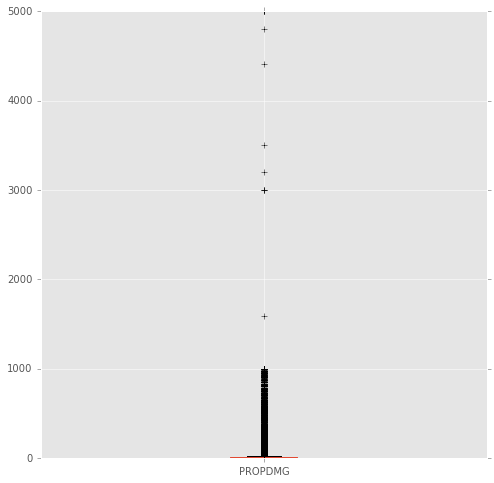

In [119]:
df[['PROPDMG']].plot(kind = 'box', figsize = (8,8))

In [118]:
df[['PROPDMG']]

,PROPDMG
REFNUM,
1.0,25.0
2.0,2.5
3.0,25.0
...,...
902295.0,0.0
902296.0,0.0
902297.0,0.0


In [121]:
df.PROPDMGEXP.unique()

array(['K', 'M', nan, 'B', 'm', '+', '0', '5', '6', '?', '4', '2', '3',
       'h', '7', 'H', '-', '1', '8'], dtype=object)

In [122]:
(df.PROPDMGEXP == '-').sum()

1

In [123]:
exponent_to_multiplier = {np.nan: np.nan, '+': np.nan, '-': np.nan, '?': np.nan,
   '0': 10 ** 0,
   '1': 10 ** 1,
   '2': 10 ** 2, 'H': 10 ** 2, 'h': 10 ** 2,
   '3': 10 ** 3,'K': 10 ** 3,'k': 10 ** 3,
   '4': 10 ** 4,
   '5': 10 ** 5,
   '6': 10 ** 6, 'M': 10 ** 6, 'm': 10 ** 6,
   '7': 10 ** 7,
   '8': 10 ** 8,
   'B': 10 ** 9}

In [124]:
df.PROPDMG = df.PROPDMG * df.PROPDMGEXP.map(exponent_to_multiplier)